In [1]:
%load_ext autoreload
%autoreload 2



In [16]:
import skimage as sk
import os
from PIL import Image
from GetDataBisGM import * 
import cv2
import pandas as pd
from okovision.tools.image import Chip
from matplotlib.pyplot import imshow, imsave, subplots
from scipy.stats import ttest_ind, mannwhitneyu
from cmath import nan
import seaborn as sns
from matplotlib import pyplot as plt

In [3]:
# split a picture
fileNameD1BF = os.path.join("oldDataAude","D1","C126_D1_BF.tif")
#image = Image.open(fileName)
chipFormat = {
                "width":13860//18,
                "height":9240//14,
                "ncol":18,
                "nrow":14,
 }

D1BF = Chip(chipFormat).create(fileNameD1BF)

# for trap in chip : get a well 
# chip.save(path)
# transform np.array()
# trap.__array__()



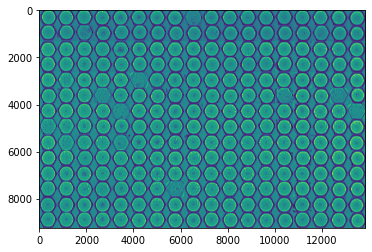

In [17]:
imshow(D1BF)

# Day 1

In [5]:
# getting chips
## loading GFP and CY3

# split a picture
fileNameD1GFP = os.path.join("oldDataAude","D1","C126_D1_GFP.tif")
fileNameD1CY3 = os.path.join("oldDataAude","D1","C126_D1_CY3.tif")

chipFormat = {
                "width":13860//18,
                "height":9240//14,
                "ncol":18,
                "nrow":14,
 }
df1_gfp = Chip(chipFormat).create(fileNameD1GFP)
df1_cy3 = Chip(chipFormat).create(fileNameD1CY3)



In [6]:
#analysis for day 1

# init of the dataframe
dfResults = pd.DataFrame(columns=['well','radius','gfp','pi','viability','thresh','norm'])

dictMaskGFP = {}
dictMaskPI = {}
dictMask = {}
i=0
for trapGFP,trapCY3 in zip(df1_gfp,df1_cy3):
    
    Res,dictMaskGFP[i],dictMaskPI[i], dictMask[i] = read_well_from_okovision(i,trapGFP,trapCY3,thresh=None,norm=None)
    print(Res.head())
    dfResults = pd.concat([dfResults,Res],ignore_index=True)
    i += 1
     


 Done for well 0
      radius          gfp          pi  viability    thresh      norm  well
0  30.078012  2722.151855  784.750244   0.509241  0.046301  0.354421   0.0
1   0.000000    33.241283   70.927628   0.330295  0.046301  0.354421   0.0

 Done for well 1
      radius         gfp          pi  viability    thresh      norm  well
0  23.896176  946.892212  202.441299   0.638595  0.024356  0.243965   1.0

 Done for well 2
Empty DataFrame
Columns: [radius, gfp, pi, viability, thresh, norm]
Index: []

 Done for well 3
      radius          gfp          pi  viability    thresh      norm  well
0  28.094446  2454.712646  978.358276   0.320718  0.044829  0.269468   3.0

 Done for well 4
      radius          gfp         pi  viability    thresh      norm  well
0  26.281547  1699.331421  917.98584   0.238403  0.046361  0.281944   4.0

 Done for well 5
     radius         gfp          pi  viability    thresh      norm  well
0  28.28052  856.326904  233.929825   0.258608  0.020137  0.077564   5

In [11]:

fileNameAnalysisD1 = os.path.join("oldDataAude","D1","analysis.txt")
dfResults.to_csv(fileNameAnalysisD1, header=True, index=None, sep='\t', mode='w')

AttributeError: 'tuple' object has no attribute 'shape'

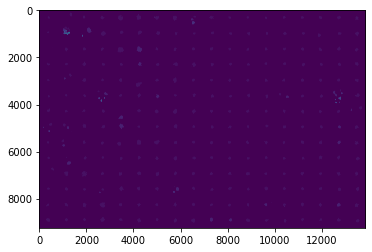

In [23]:
# saving the masks 

path = os.path.join("oldDataAude","D1","masks")


imMaskD1 = Chip(chipFormat).createFromTraps(dictMask)
nameDictMask = os.path.join(path,"dictMaskD1.txt")
with open(nameDictMask,'w') as f:
    print(dictMask,file=f)

nameImMask = os.path.join(path,"imMaskD1.tif")
imMaskD1_save = imshow(imMaskD1)
imsave(nameImMask,imMaskD1_save)



imMaskGFPD1 = Chip(chipFormat).createFromTraps(dictMaskGFP)
nameDictMask = os.path.join(path,"dictMaskGFPD1.txt")
with open(nameDictMask,'w') as f:
    print(dictMaskGFP,file=f)

imMaskPID1 = Chip(chipFormat).createFromTraps(dictMaskPI)
nameDictMask = os.path.join(path,"dictMaskPID1.txt")
with open(nameDictMask,'w') as f:
    print(dictMaskPI,file=f)

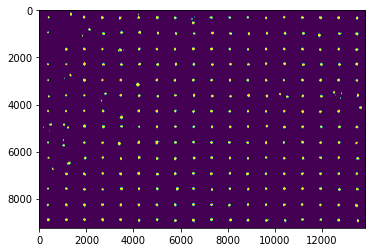

In [15]:
# vizualisation

imshow(imMaskGFPD1)

#for Day 3

In [24]:
# analysis chip
## loading GFP and CY3

# split a picture
fileNameD3BF = os.path.join("oldDataAude","D3","C126_D3_BF.tif")
fileNameD3GFP = os.path.join("oldDataAude","D3","C126_D3_GFP.tif")
fileNameD3CY3 = os.path.join("oldDataAude","D3","C126_D3_CY3.tif")

chipFormat = {
                "width":13860//18,
                "height":9240//14,
                "ncol":18,
                "nrow":14,
 }
df3_bf = Chip(chipFormat).create(fileNameD3BF)
df3_gfp = Chip(chipFormat).create(fileNameD3GFP)
df3_cy3 = Chip(chipFormat).create(fileNameD3CY3)


In [25]:
#analysing for D3

# init of the dataframe
dfResults_D3 = pd.DataFrame(columns=['well','radius','gfp','pi','viability','thresh','norm'])

dictMaskGFP_D3 = {}
dictMaskPI_D3 = {}
dictMask_D3 = {}
i=0
for trapGFP,trapCY3 in zip(df3_gfp,df3_cy3):
    
    Res,dictMaskGFP_D3[i],dictMaskPI_D3[i], dictMask_D3[i] = read_well_from_okovision(i,trapGFP,trapCY3,thresh=None,norm=None)
    print(Res.head())
    dfResults_D3 = pd.concat([dfResults_D3,Res],ignore_index=True)
    i += 1


 Done for well 0
      radius          gfp           pi  viability    thresh      norm  well
0  36.738274  2463.983643  3634.285645   0.235494  0.112922  0.576708   0.0

 Done for well 1
      radius          gfp          pi  viability    thresh      norm  well
0  28.020151  2323.034668  983.415283   0.467452  0.059469  0.530553   1.0

 Done for well 2
Empty DataFrame
Columns: [radius, gfp, pi, viability, thresh, norm]
Index: []

 Done for well 3
      radius          gfp           pi  viability    thresh      norm  well
0  37.216536  2213.238525  3898.311279   0.195873  0.122697  0.649323   3.0

 Done for well 4
      radius          gfp          pi  viability    thresh      norm  well
0  28.803536  1610.857056  657.688477   0.295474  0.038719  0.223995   4.0

 Done for well 5
      radius         gfp           pi  viability  thresh      norm  well
0  34.083565  1347.77771  2669.322021   0.224797  0.0922  0.500318   5.0

 Done for well 6
     radius          gfp           pi  viabili

In [26]:
fileNameAnalysisD3 = os.path.join("oldDataAude","D3","analysis.txt")
dfResults_D3.to_csv(fileNameAnalysisD3, header=True, index=None, sep='\t', mode='w')

In [27]:
# saving the masks 

path = os.path.join("oldDataAude","D3","masks")


imMaskD3 = Chip(chipFormat).createFromTraps(dictMask_D3)
nameDictMask = os.path.join(path,"dictMaskD3.txt")
with open(nameDictMask,'w') as f:
    print(dictMask_D3,file=f)


imMaskGFPD3 = Chip(chipFormat).createFromTraps(dictMaskGFP_D3)
nameDictMask = os.path.join(path,"dictMaskGFPD3.txt")
with open(nameDictMask,'w') as f:
    print(dictMaskGFP_D3,file=f)

imMaskPID3 = Chip(chipFormat).createFromTraps(dictMaskPI_D3)
nameDictMask = os.path.join(path,"dictMaskPID3.txt")
with open(nameDictMask,'w') as f:
    print(dictMaskPI_D3,file=f)

In [28]:
dfResults_D3.viability.describe()

count    312.000000
mean       0.255404
std        0.095479
min        0.100681
25%        0.191932
50%        0.232153
75%        0.295292
max        1.000000
Name: viability, dtype: float64

In [29]:
dfResults["date"] = "D1"
dfResults_D3["date"] = "D3"



In [30]:
# concat the df 

dfPooled = pd.concat([dfResults,dfResults_D3],ignore_index=True)

In [31]:
fileNameAnalysisPooled = os.path.join("oldDataAude","analysisPooled.txt")
dfPooled.to_csv(fileNameAnalysisPooled, header=True, index=None, sep='\t', mode='w')

#Opening already created files

In [4]:
fileName = os.path.join("oldDataAude","analysisPooled.txt")
df = pd.read_csv(fileName,sep="\t")

In [5]:
# a bit of filtration 

df2 = df[(df["radius"]>10)&(df["viability"]<1)]

Checkcing the masks

In [4]:
fileName = os.path.join("oldDataAude","D1","masks","dictMaskD1.txt")
#maskD1 = np.loadtxt(os.path.join("oldDataAude","D1","masks","dictMaskD1.txt"))


with open(fileName) as f:
    lines = f.readlines()

#Now we plot 

In [7]:
for date in df.date.unique():   
    print(f"\nViability for {date}:\n")
    print(df2[df2["date"] == date]["viability"].describe())


Viability for D1:

count    259.000000
mean       0.306525
std        0.124920
min        0.116303
25%        0.222604
50%        0.289685
75%        0.354546
max        0.931890
Name: viability, dtype: float64

Viability for D3:

count    256.000000
mean       0.247684
std        0.088282
min        0.119915
25%        0.190574
50%        0.223073
75%        0.288800
max        0.880994
Name: viability, dtype: float64


In [8]:
# statistics 
viabD1 = df2[df2.date == "D1"].viability.to_list()
viabD3 = df2[df2.date == "D3"].viability.to_list()

t,pValT = ttest_ind(a=viabD1,b=viabD3,equal_var=False)
print(f"\nt-test p_value for the viability on both dates:{pValT}")

u,pValU = mannwhitneyu(x=viabD1,y=viabD3,method="auto")
print(f"\nmaanwitney p_value for the viability on both dates:{pValU}")


t-test p_value for the viability on both dates:1.415340762889878e-09

maanwitney p_value for the viability on both dates:3.814605211695129e-10


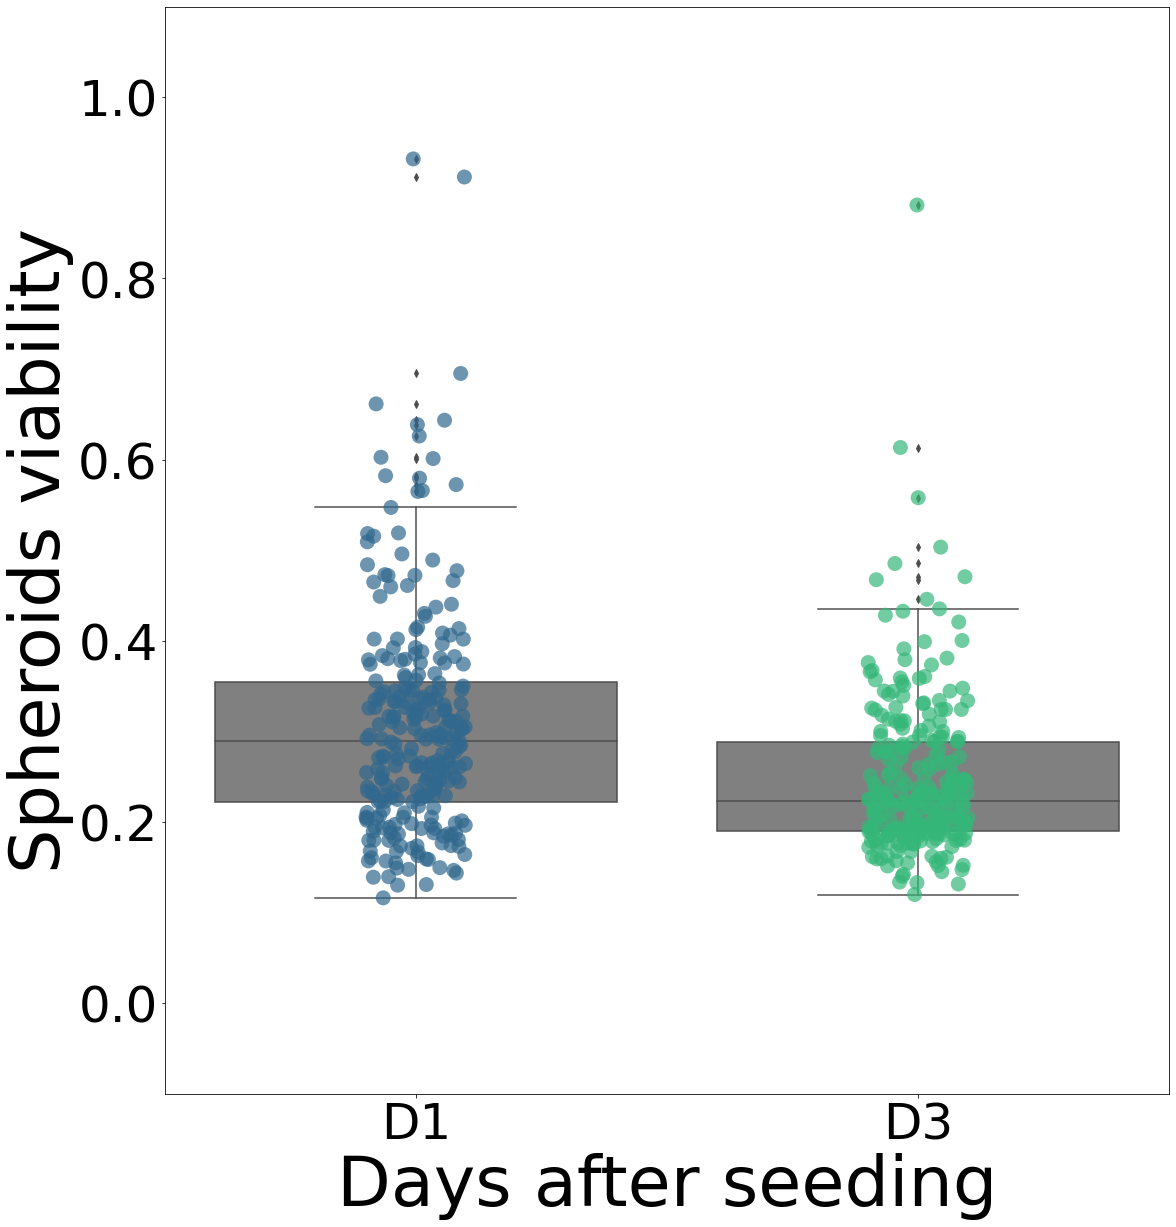

In [45]:
# setting the figure
fig,axes = subplots(figsize=(18,20))

sns.boxplot(data= df2,x="date",y="viability", ax = axes,color='grey')
sns.stripplot(data= df2,x="date",y="viability", size=15,palette='viridis',alpha=0.7,ax = axes)

axes.set_xlabel("Days after seeding",fontsize=70)
axes.set_ylabel('Spheroids viability',fontsize=70)
axes.tick_params(axis='both', which='major', labelsize=50)

axes.set_ylim((-.1,1.1))

#plotting
fileName = "20221010_chips400_viability_lowSize.svg"
p = os.path.join("analysisGM",fileName)
plt.savefig(p)






<AxesSubplot:xlabel='date', ylabel='viability'>

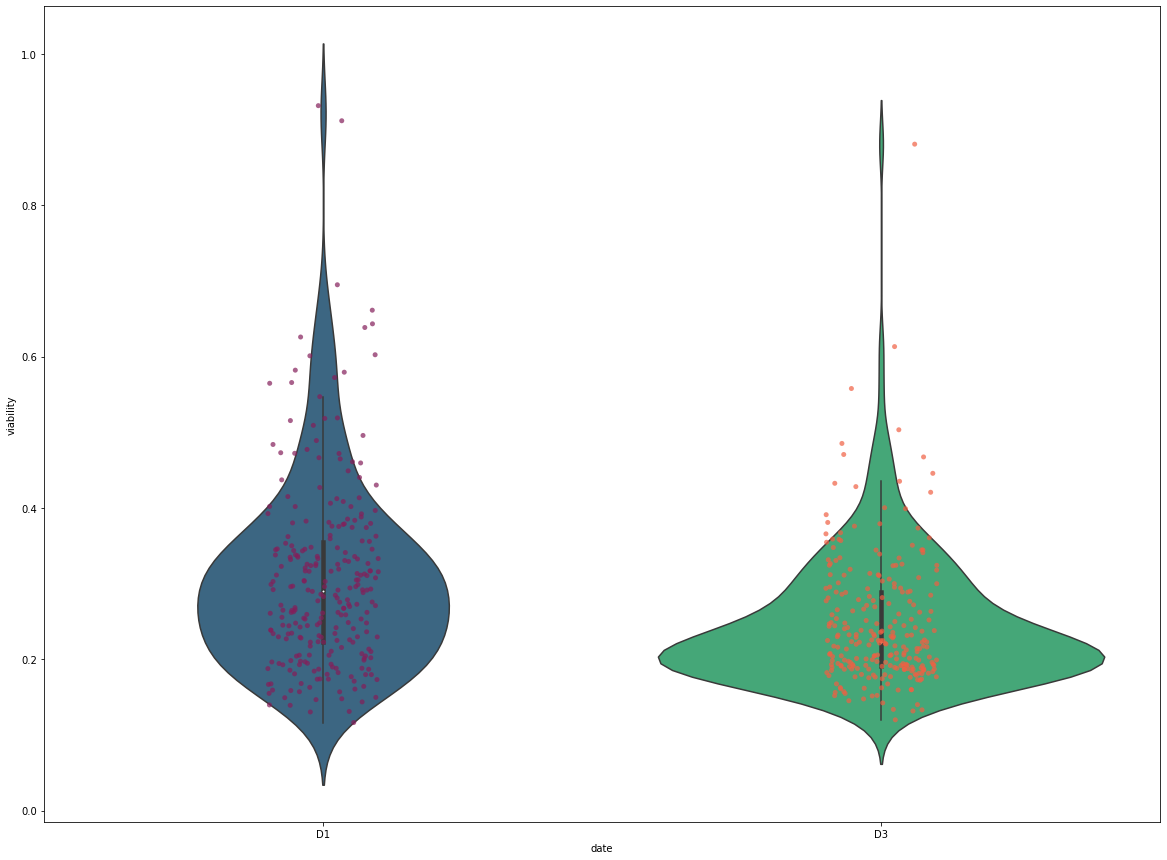

In [35]:
import seaborn as sns

fig,axes = subplots(figsize=(20,15))

sns.violinplot(data= df2,x="date",y="viability", ax = axes,palette='viridis')
sns.stripplot(data= df2,x="date",y="viability", palette='rocket',alpha=0.7,ax = axes)

<AxesSubplot:xlabel='viability', ylabel='Count'>

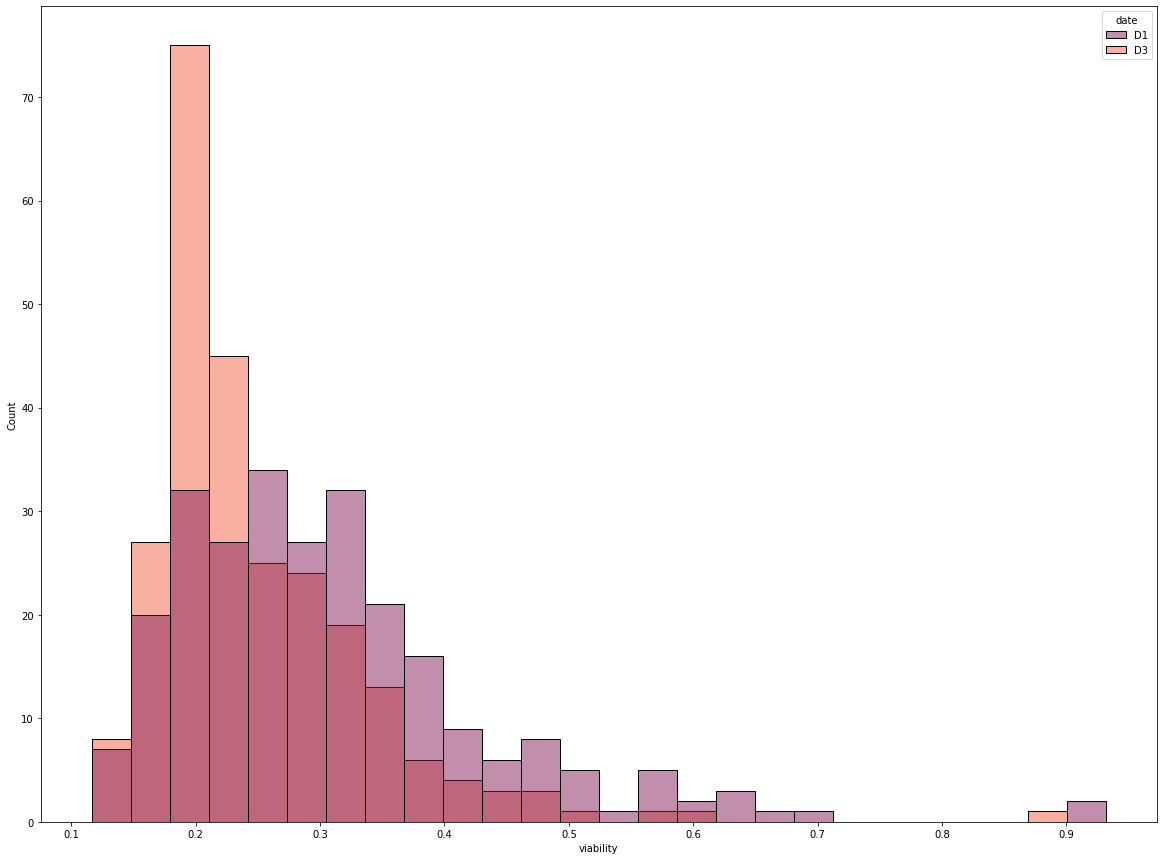

In [40]:
import seaborn as sns

fig,axes = subplots(figsize=(20,15))

sns.histplot(data= df2,x="viability",hue = "date", palette='rocket',ax = axes)


<AxesSubplot:xlabel='date', ylabel='viability'>

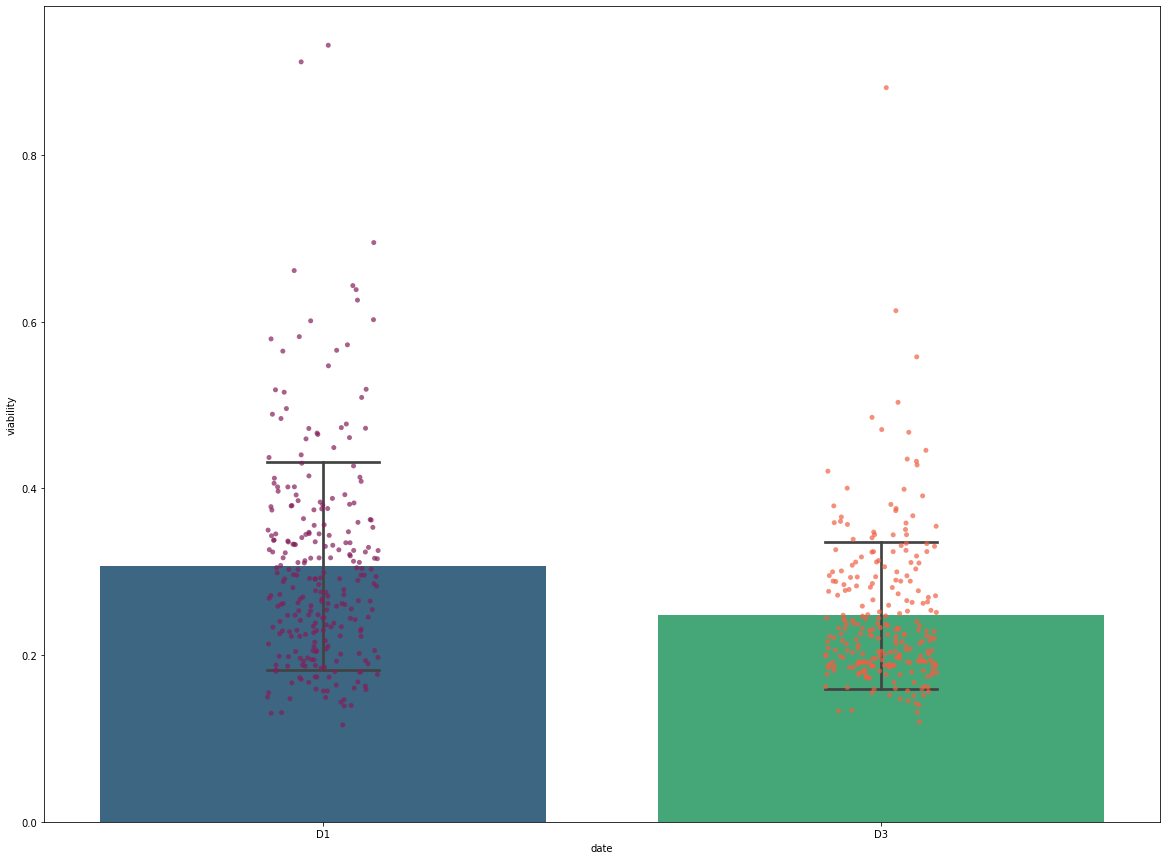

In [42]:
import seaborn as sns

fig,axes = subplots(figsize=(20,15))

sns.barplot(data= df2,x="date",y = "viability", ci="sd", capsize=0.2, ax = axes,palette='viridis')
sns.stripplot(data= df2,x="date",y="viability", palette='rocket',alpha=0.7,ax = axes)

<AxesSubplot:xlabel='date', ylabel='viability'>

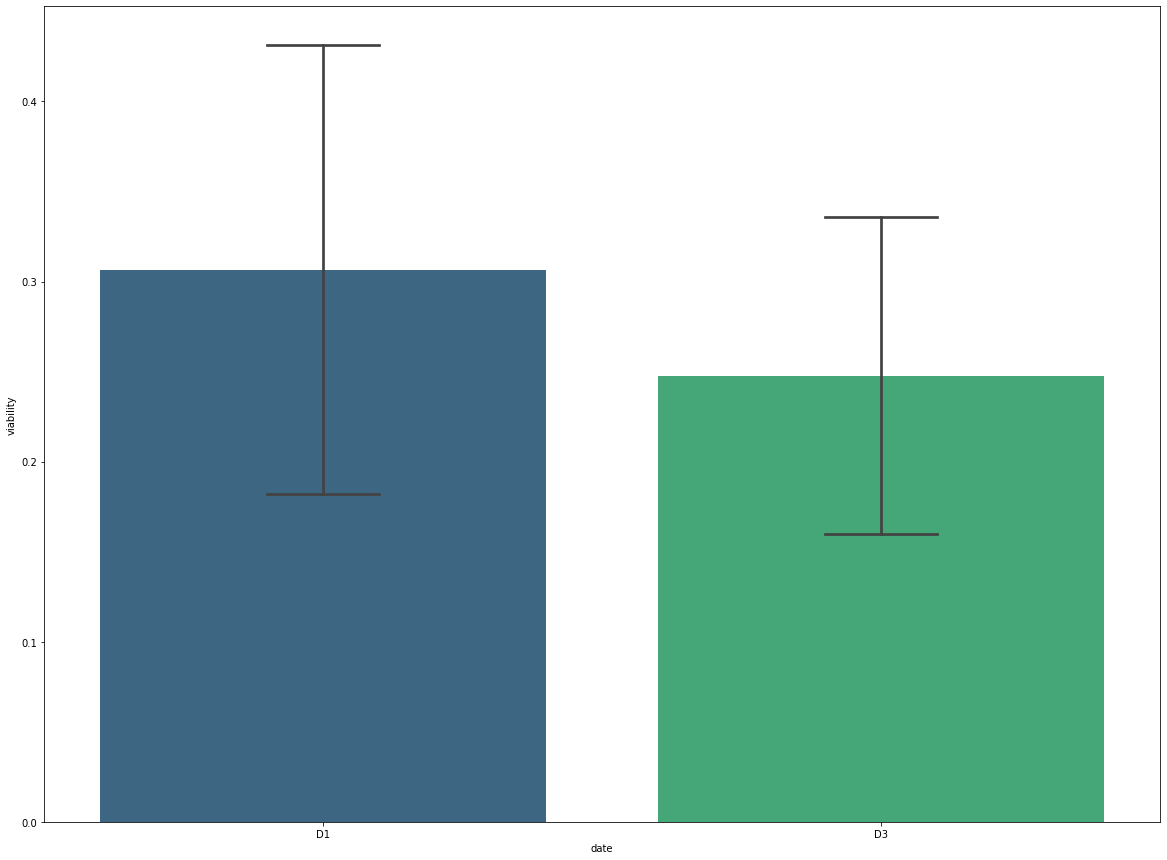

In [10]:
import seaborn as sns

fig,axes = subplots(figsize=(20,15))

sns.barplot(data= df2,x="date",y = "viability", ci="sd", capsize=0.2, ax = axes,palette='viridis')


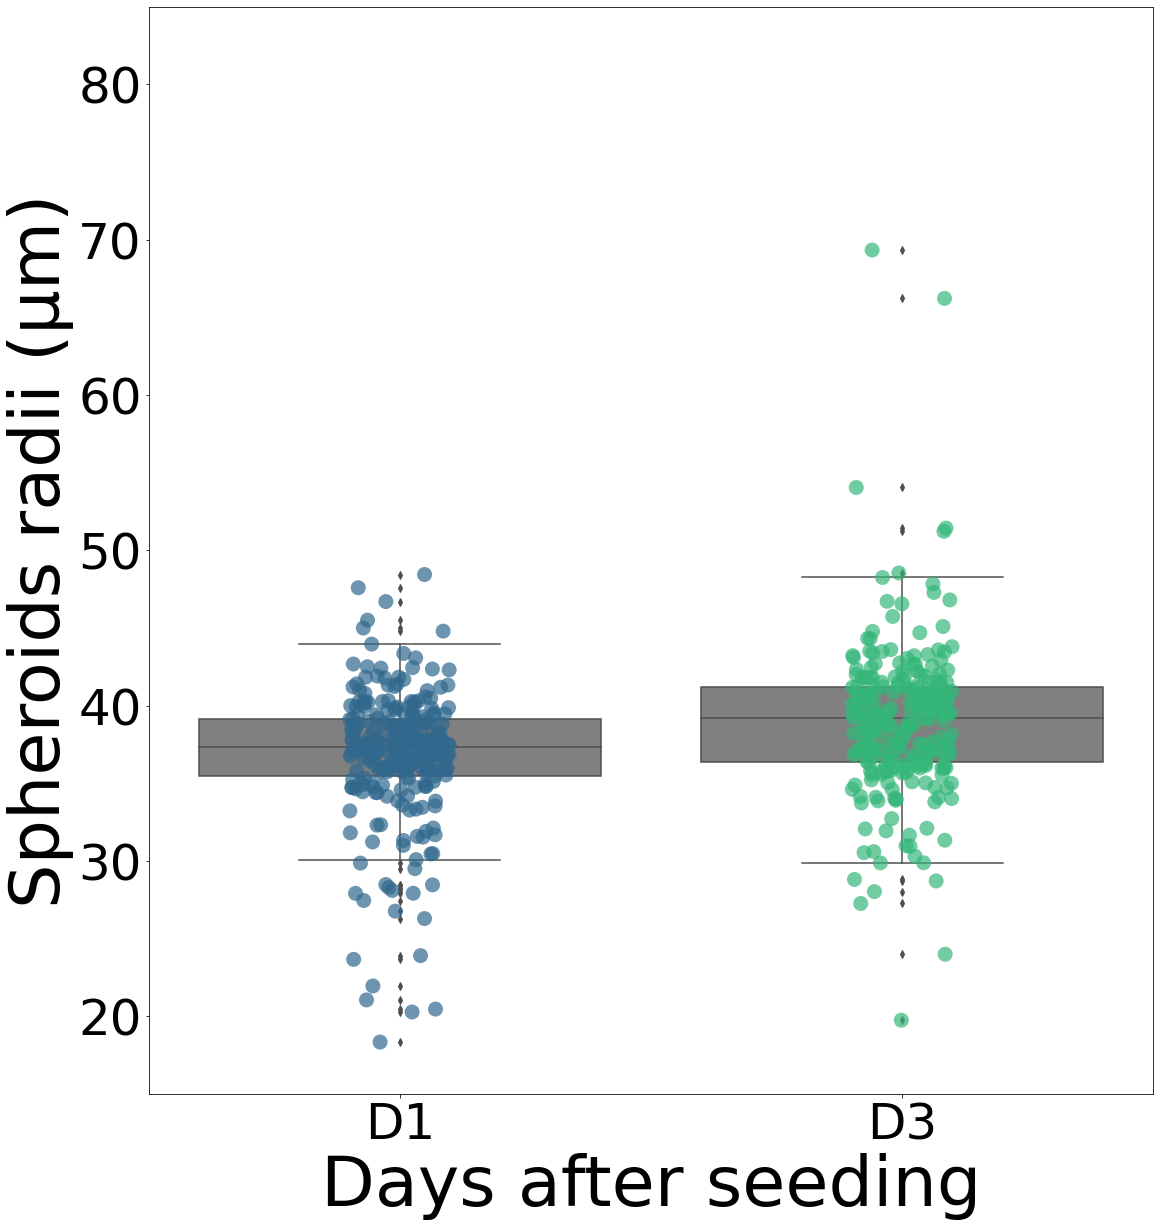

In [44]:
fig,axes = subplots(figsize=(18,20))
sns.boxplot(data= df2,x="date",y="radius", ax = axes,color='grey')
sns.stripplot(data= df2,x="date",y="radius",size=15, palette='viridis',alpha=0.7,ax = axes)

axes.set_xlabel("Days after seeding",fontsize=70)
axes.set_ylabel('Spheroids radii (µm)',fontsize=70)
axes.tick_params(axis='both', which='major', labelsize=50)

axes.set_ylim((15,85))

#plotting
fileName = "20221010_chips400_radii_adaptedsize.svg"
p = os.path.join("analysisGM",fileName)
plt.savefig(p)
